# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
!git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
!pip install -e .

C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\ultralytics


Cloning into 'ultralytics'...
Updating files:   7% (42/566)
Updating files:   8% (46/566)
Updating files:   9% (51/566)
Updating files:  10% (57/566)
Updating files:  11% (63/566)
Updating files:  12% (68/566)
Updating files:  13% (74/566)
Updating files:  14% (80/566)
Updating files:  15% (85/566)
Updating files:  16% (91/566)
Updating files:  17% (97/566)
Updating files:  18% (102/566)
Updating files:  19% (108/566)
Updating files:  19% (113/566)
Updating files:  20% (114/566)
Updating files:  21% (119/566)
Updating files:  22% (125/566)
Updating files:  23% (131/566)
Updating files:  24% (136/566)
Updating files:  25% (142/566)
Updating files:  26% (148/566)
Updating files:  27% (153/566)
Updating files:  28% (159/566)
Updating files:  29% (165/566)
Updating files:  30% (170/566)
Updating files:  31% (176/566)
Updating files:  31% (179/566)
Updating files:  32% (182/566)
Updating files:  33% (187/566)
Updating files:  34% (193/566)
Updating files:  35% (199/566)
Updating files:  36%

Obtaining file:///C:/Users/CP1/Documents/GitHub/Consignment-Itemized-Data/ultralytics
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for ultralytics (pyproject.toml): started
  Building editable for ultralytics (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.1.28-0.editable-py3-none-any.whl size=22947 sha256=b478ff599223248ca10562105f2a7ab1ba9190bc32ac03053703163ed5c4007e
  Stored in directory: C:\Users\CP1\AppData\Local\Temp\pip-ephem-wheel-cache-i1o2eopo\wheels\03\01\2c\

# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('configuration/config-CID.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data


C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


{'path': 'C:/Users/CP1/Documents/GitHub/Consignment-Itemized-Data/CID-yolov8',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['Table']}

In [4]:
# Define number of classes based on YAML
with open('configuration/config-CID.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data


# 3 Train YOLOv8

In [ ]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='configuration/config-CID.yaml', epochs=1000, workers=1, imgsz=416)  # train the model

Ultralytics YOLOv8.1.28 🚀 Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=configuration/config-CID.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

train: Scanning CID-yolov8\obj_train_data... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 491.40it/s]


train: New cache created: CID-yolov8\obj_train_data.cache


val: Scanning CID-yolov8\obj_train_data... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 406.05it/s]

val: New cache created: CID-yolov8\obj_train_data.cache


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 1 dataloader workers
Logging results to runs\detect\train3
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.82G      1.603      2.904      1.597          6        416: 100%|██████████| 9/9 [00:20<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20     0.0925       0.15     0.0567     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.95G      1.077      1.851      1.299          4        416: 100%|██████████| 9/9 [00:01<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         20         20      0.124       0.35     0.0916     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.95G     0.8407      1.357      1.164          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         20         20      0.113        0.1     0.0166    0.00804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.95G     0.8377      1.176      1.111          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         20         20      0.354       0.55      0.281      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.95G     0.7581      1.092      1.049          8        416: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         20         20       0.11       0.45     0.0793     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.95G     0.7764      1.024       1.07          3        416: 100%|██████████| 9/9 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         20         20      0.148        0.4      0.136     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.95G     0.7877      1.056      1.064          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         20         20    0.00497        0.8    0.00567     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.95G     0.8392      1.001      1.072          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         20   0.000963       0.05   0.000184   5.53e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.95G      0.767      0.927      1.023          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all         20         20     0.0121        0.7     0.0157    0.00359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.95G      0.809     0.8988      1.048          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all         20         20     0.0103       0.35     0.0071     0.0035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.95G     0.8243      1.017      1.064          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         20         20      0.217       0.25      0.122     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.95G      0.854     0.9333      1.082          5        416: 100%|██████████| 9/9 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all         20         20      0.287       0.55      0.245       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.95G     0.8311     0.8898      1.075          5        416: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         20         20      0.212        0.7      0.198     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.95G     0.7448     0.7943      1.043          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         20         20      0.161        0.7      0.247     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.95G     0.8035     0.9057      1.064          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all         20         20      0.405        0.4      0.309      0.082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.95G        0.7      0.855      1.039          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all         20         20      0.358        0.4       0.32      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.95G     0.7619     0.7622      1.035          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         20         20      0.368        0.4      0.294      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.95G     0.6958     0.7725       1.03          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.86it/s]

                   all         20         20      0.382        0.5      0.335      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.95G     0.7364     0.7787      1.058          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all         20         20      0.438        0.6      0.415      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      1.95G     0.7063     0.7932      1.032          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         20         20      0.425       0.45      0.323      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.95G     0.7069     0.8527      1.044          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         20         20      0.417       0.35      0.277      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.95G     0.6477     0.7753      1.018          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         20         20      0.404      0.645      0.383       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.95G     0.6674     0.8254      1.006          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all         20         20      0.391       0.15      0.172     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.95G     0.7084     0.8252      1.013          7        416: 100%|██████████| 9/9 [00:01<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         20         20      0.583       0.45      0.417      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.95G     0.6271     0.7072      1.001          6        416: 100%|██████████| 9/9 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         20         20      0.478       0.45      0.305     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.95G     0.6397     0.7696      1.006          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all         20         20      0.491       0.45      0.342      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.95G     0.6619     0.7054      1.021          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         20         20      0.595       0.45      0.477      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.95G     0.6937     0.7338      1.005          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         20         20      0.373       0.55      0.428      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.95G      0.624     0.6635      0.981          7        416: 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all         20         20      0.427      0.448      0.493      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.95G     0.6034     0.6854     0.9639          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         20         20      0.463        0.6      0.498      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.95G     0.6221     0.7062     0.9772          7        416: 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         20      0.521      0.382      0.295      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.95G     0.5943     0.7097     0.9753          8        416: 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         20         20      0.404        0.6       0.37      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.95G      0.572     0.6048     0.9502          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         20         20      0.406       0.35      0.343      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.95G     0.6719     0.7543      1.008          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         20         20      0.256        0.4      0.271      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.95G     0.5598     0.6227     0.9786          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         20         20      0.419        0.4      0.347      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.95G     0.5754     0.6679     0.9855          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         20         20      0.431      0.493      0.426      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.95G     0.6202       0.72     0.9745          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         20         20      0.416        0.5       0.47      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.95G     0.5843     0.8161     0.9861          2        416: 100%|██████████| 9/9 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         20         20      0.412       0.65      0.412       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.95G     0.5443     0.6427     0.9723          2        416: 100%|██████████| 9/9 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         20         20      0.327        0.5      0.469      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.95G     0.5535     0.5729     0.9495          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         20         20      0.407       0.55      0.426      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.95G      0.514     0.5998     0.9395          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         20         20      0.354       0.55      0.375      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.95G     0.5482     0.7323      0.971          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         20         20      0.352        0.5      0.363      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.95G      0.548     0.6075     0.9869          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         20         20      0.404        0.5      0.399      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.95G     0.6067     0.7224     0.9878          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all         20         20      0.434        0.6      0.468      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.95G     0.5315     0.5939     0.9408          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all         20         20      0.392        0.5        0.4      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.95G     0.5302     0.6155     0.9636          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all         20         20      0.401        0.5      0.392      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.95G     0.5065     0.6144     0.9561          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         20         20      0.453        0.6       0.48      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      1.95G      0.596     0.6885      0.969          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all         20         20      0.418        0.6      0.513      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      1.95G     0.5558     0.6421     0.9646          8        416: 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         20         20      0.429      0.675      0.505      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      1.95G     0.5152     0.5444     0.9555          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         20         20      0.457       0.75      0.477      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.95G      0.506     0.5885     0.9462          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all         20         20      0.404       0.65      0.478      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.95G     0.5869     0.6473      1.006          4        416: 100%|██████████| 9/9 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         20         20      0.525        0.4      0.459       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      1.95G     0.5036     0.6418     0.9437          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         20         20      0.518        0.4      0.431       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.95G     0.5231     0.5985     0.9414          6        416: 100%|██████████| 9/9 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         20         20      0.434      0.499      0.482      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      1.95G      0.537     0.6064     0.9853          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         20         20       0.39      0.671      0.469      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      1.95G     0.4868     0.6119     0.9556          4        416: 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         20         20      0.447        0.5      0.451      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.95G     0.5965     0.6836     0.9568          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         20         20      0.375       0.85      0.417      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.95G     0.5395     0.6277     0.9826          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         20         20      0.354      0.659      0.406      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      1.95G     0.4726     0.5322     0.9259          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         20      0.341        0.6      0.363      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.95G     0.5036     0.5187     0.9502          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all         20         20       0.42        0.4      0.424       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.95G      0.504     0.6483     0.9407          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         20         20       0.49        0.4      0.481      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.95G     0.4855     0.5181     0.9286          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all         20         20      0.512        0.4      0.471      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.95G      0.523     0.5683     0.9728          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all         20         20      0.381       0.55      0.466      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.95G     0.4711     0.6562     0.9533          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         20         20      0.496        0.7      0.508      0.207


# 4 Evaluate the model

In [14]:
results.results_dict

NameError: name 'results' is not defined

In [15]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

NameError: name 'results' is not defined

## 4.1 Visualize the Training Data

In [16]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

NameError: name 'results' is not defined

## 4.2 Visualize the Labels of Validating Data

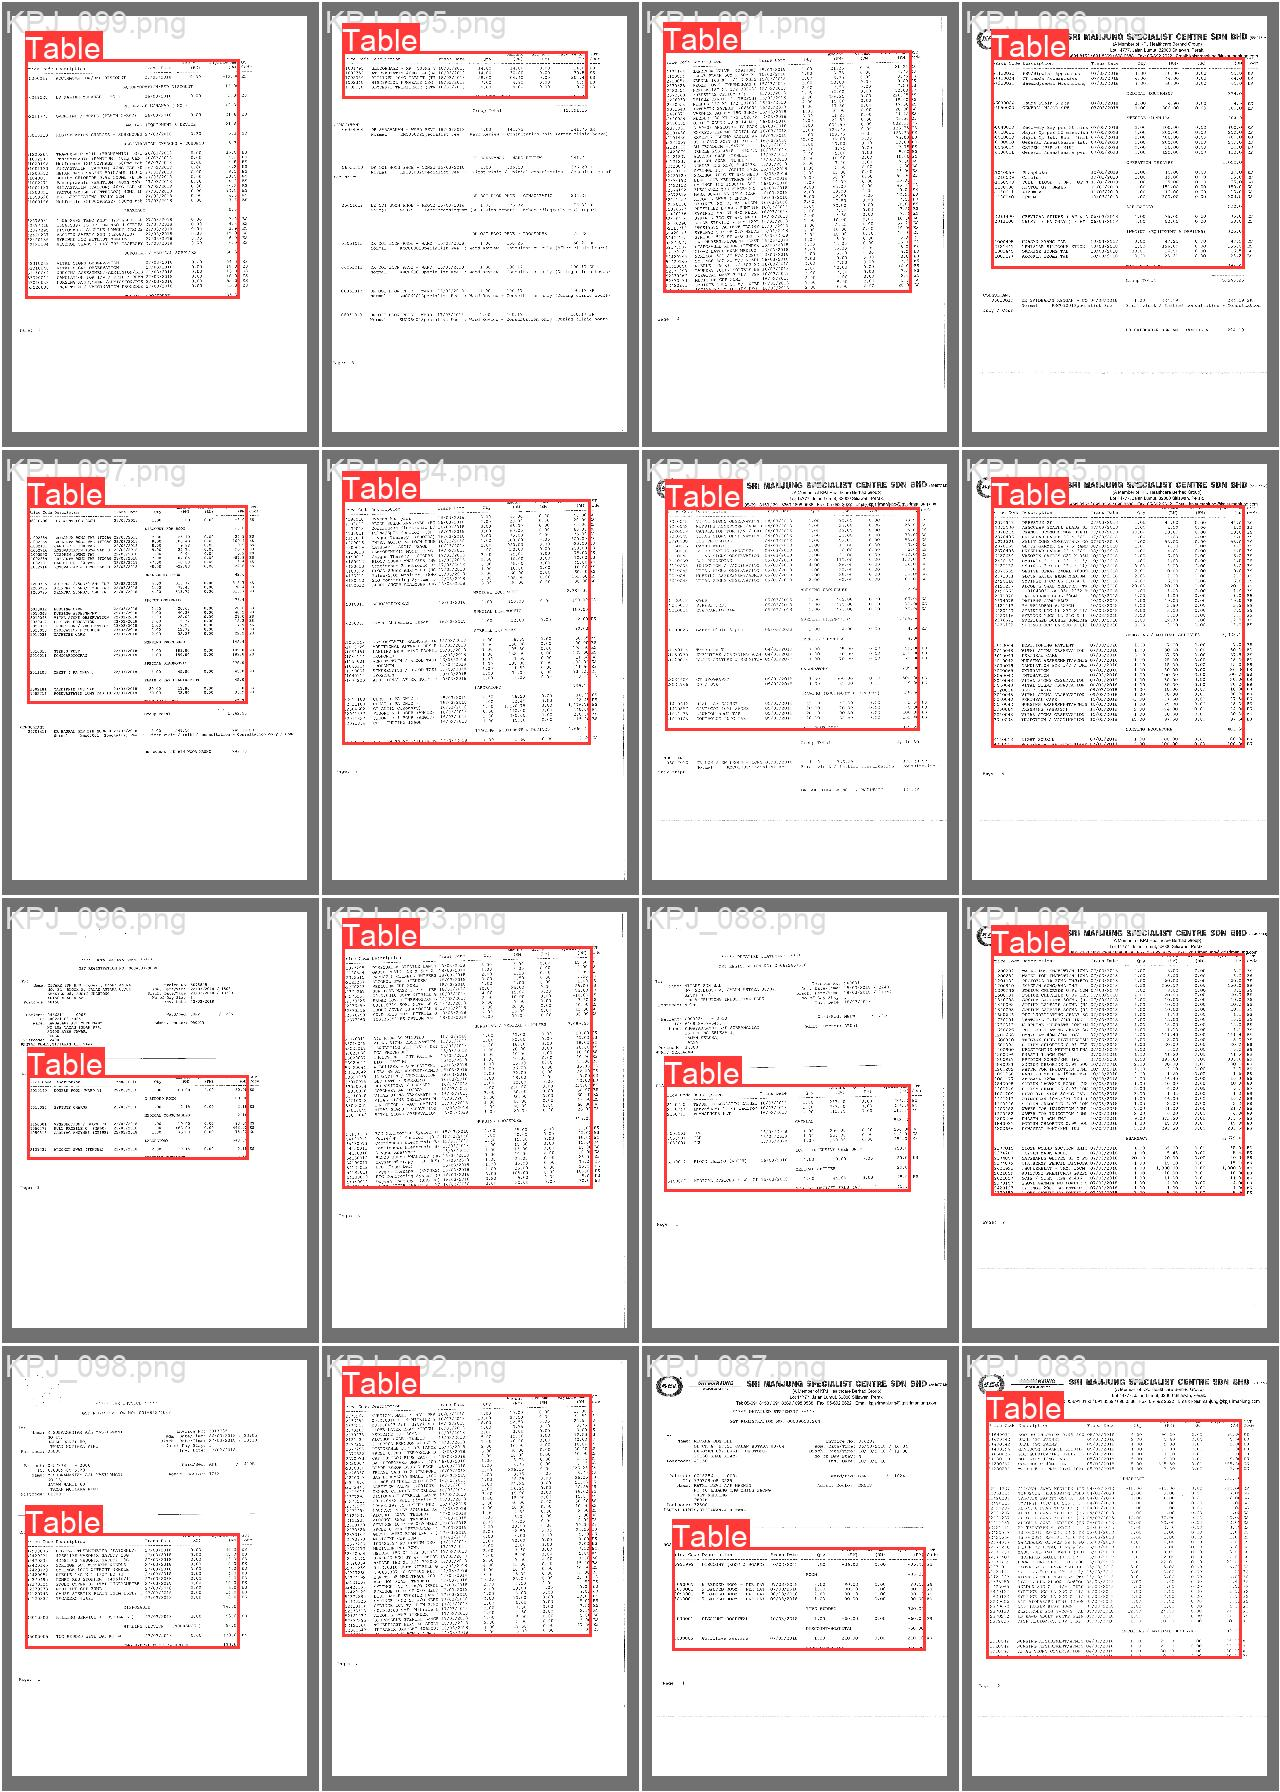

In [10]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

## 4.3 Visualize the Predicted Testing Data

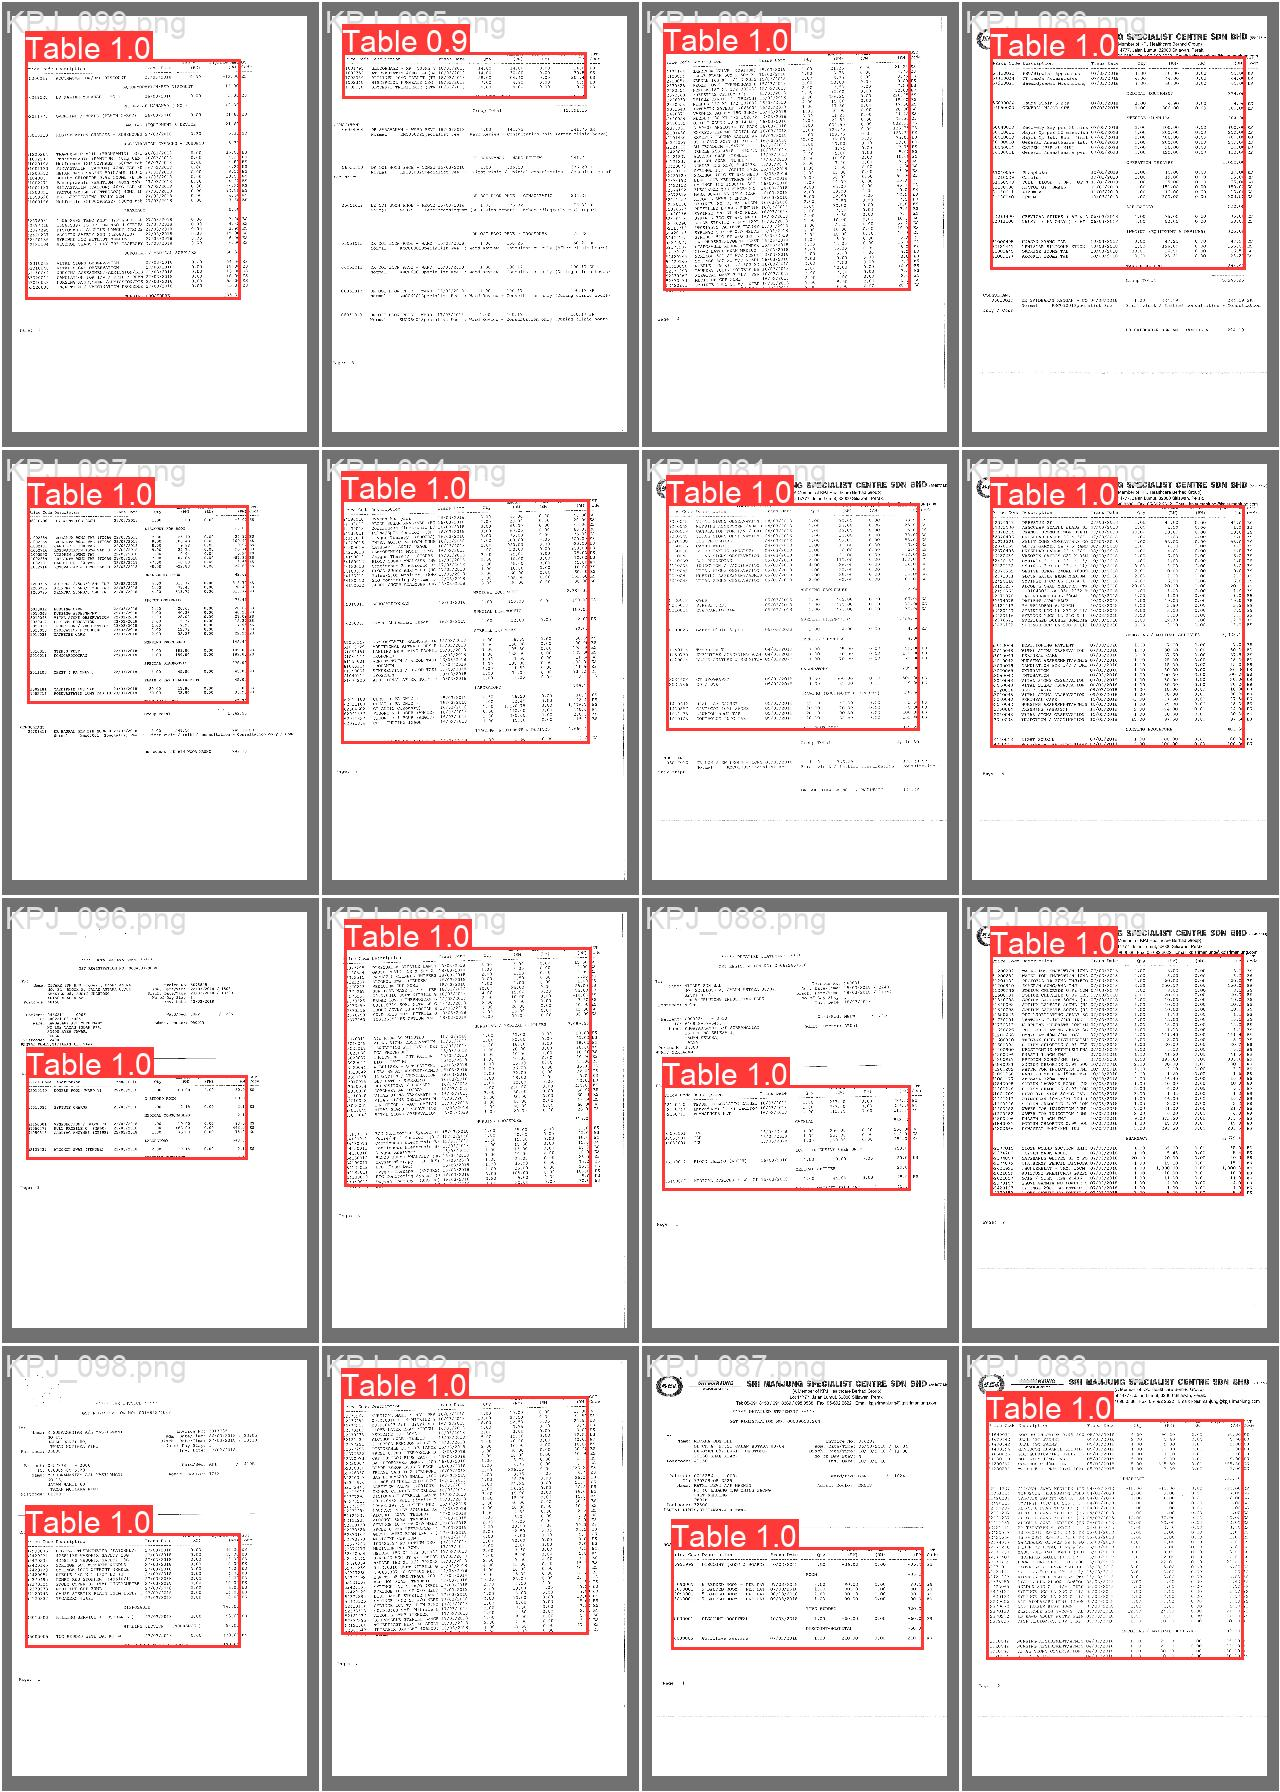

In [11]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [12]:
source = 'data/KPJ_01_test'
# model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
model = YOLO(f'runs/detect/train/weights/best.pt')

# model = YOLO('best.pt')

# deskewer = DataAugmentation.Deskew(source)
# deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416)

image 1/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_1.png: 416x320 1 Table, 31.1ms
image 2/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_10.png: 416x320 (no detections), 15.6ms
image 3/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_11.png: 416x320 (no detections), 15.6ms
image 4/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_12.png: 416x320 (no detections), 25.6ms
image 5/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_13.png: 416x320 (no detections), 15.1ms
image 6/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_14.png: 416x320 1 Table, 31.7ms
image 7/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_15.png: 416x320 (no detections), 31.8ms
image 8/3

In [25]:
print(results.save_dir)

runs\detect\train
